In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load the dataset
data = pd.read_csv('C:/Users/Administrator/Documents/corona_virus/data/forest+fires/forestfires.csv')

In [64]:
# Preprocess the data
for col_name in data.columns:
    print(col_name)
    print("Total NaN: ", data[col_name].isna().sum())
    print("Total null: ", data[col_name].isnull().sum())
    print("Data type: ", data[col_name].dtype)
    print("+"*10)

X
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Y
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
month
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
day
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
FFMC
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
DMC
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
DC
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
ISI
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
temp
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
RH
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
wind
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
rain
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
area
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++


In [65]:
# statistics about the fires dataframe
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [66]:
def convert_month(month: str) -> int:
    month_dict = {
        "jan":1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    }
    return month_dict[month]

In [67]:
def convert_day(day: str) -> int:
    day_dict = {
        "mon": 0,
        "tue": 1,
        "wed": 2,
        "thu": 3,
        "fri": 4,
        "sat": 5,
        "sun": 6
    }
    return day_dict[day]

In [68]:
data["day"] = data["day"].apply(convert_day)

In [69]:
data["month"] = data["month"].apply(convert_month)

In [70]:
data["FFMC"] = (data["FFMC"] - data["FFMC"].mean()) / data["FFMC"].std()
data["DC"] = (data["DC"] - data["DC"].mean()) / data["DC"].std()

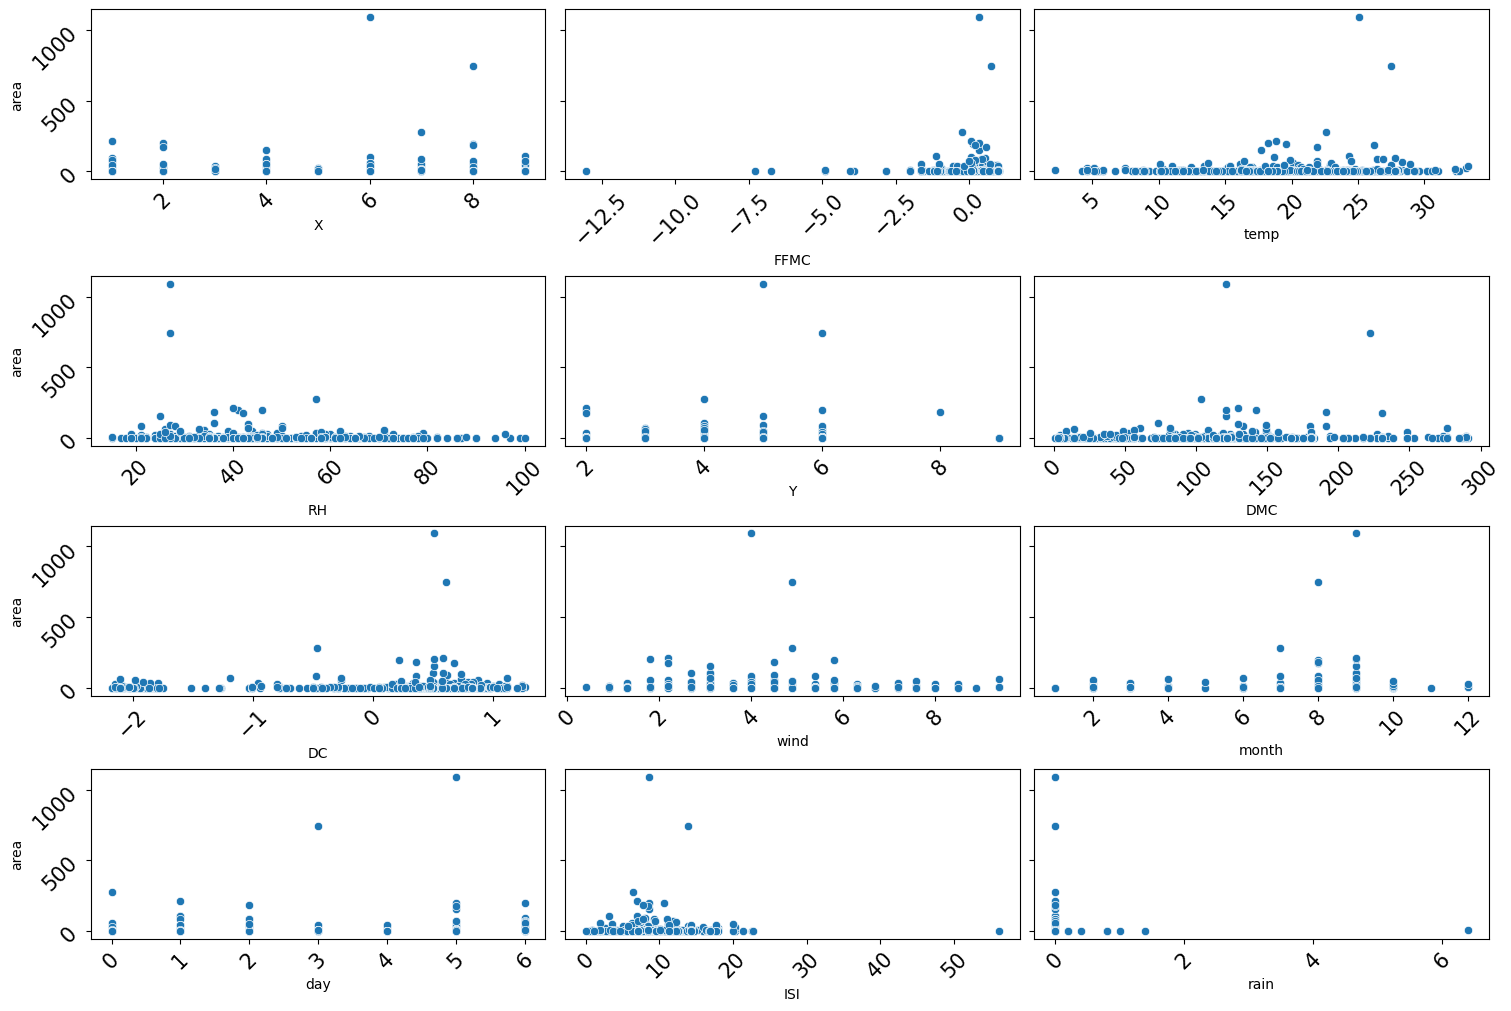

In [71]:
target = "area"
fig, axs = plt.subplots(ncols=3, nrows= 4, sharey= "all", constrained_layout= True)
fig.set_figwidth(15)
fig.set_figheight(10)
for i, col_name in enumerate(data.columns[:-1]):
    ax=axs[i%4, i%3]
    ax.tick_params(labelrotation= 45, labelsize= 15)
    sns.scatterplot(x=col_name, y= target, data= data, ax= ax)

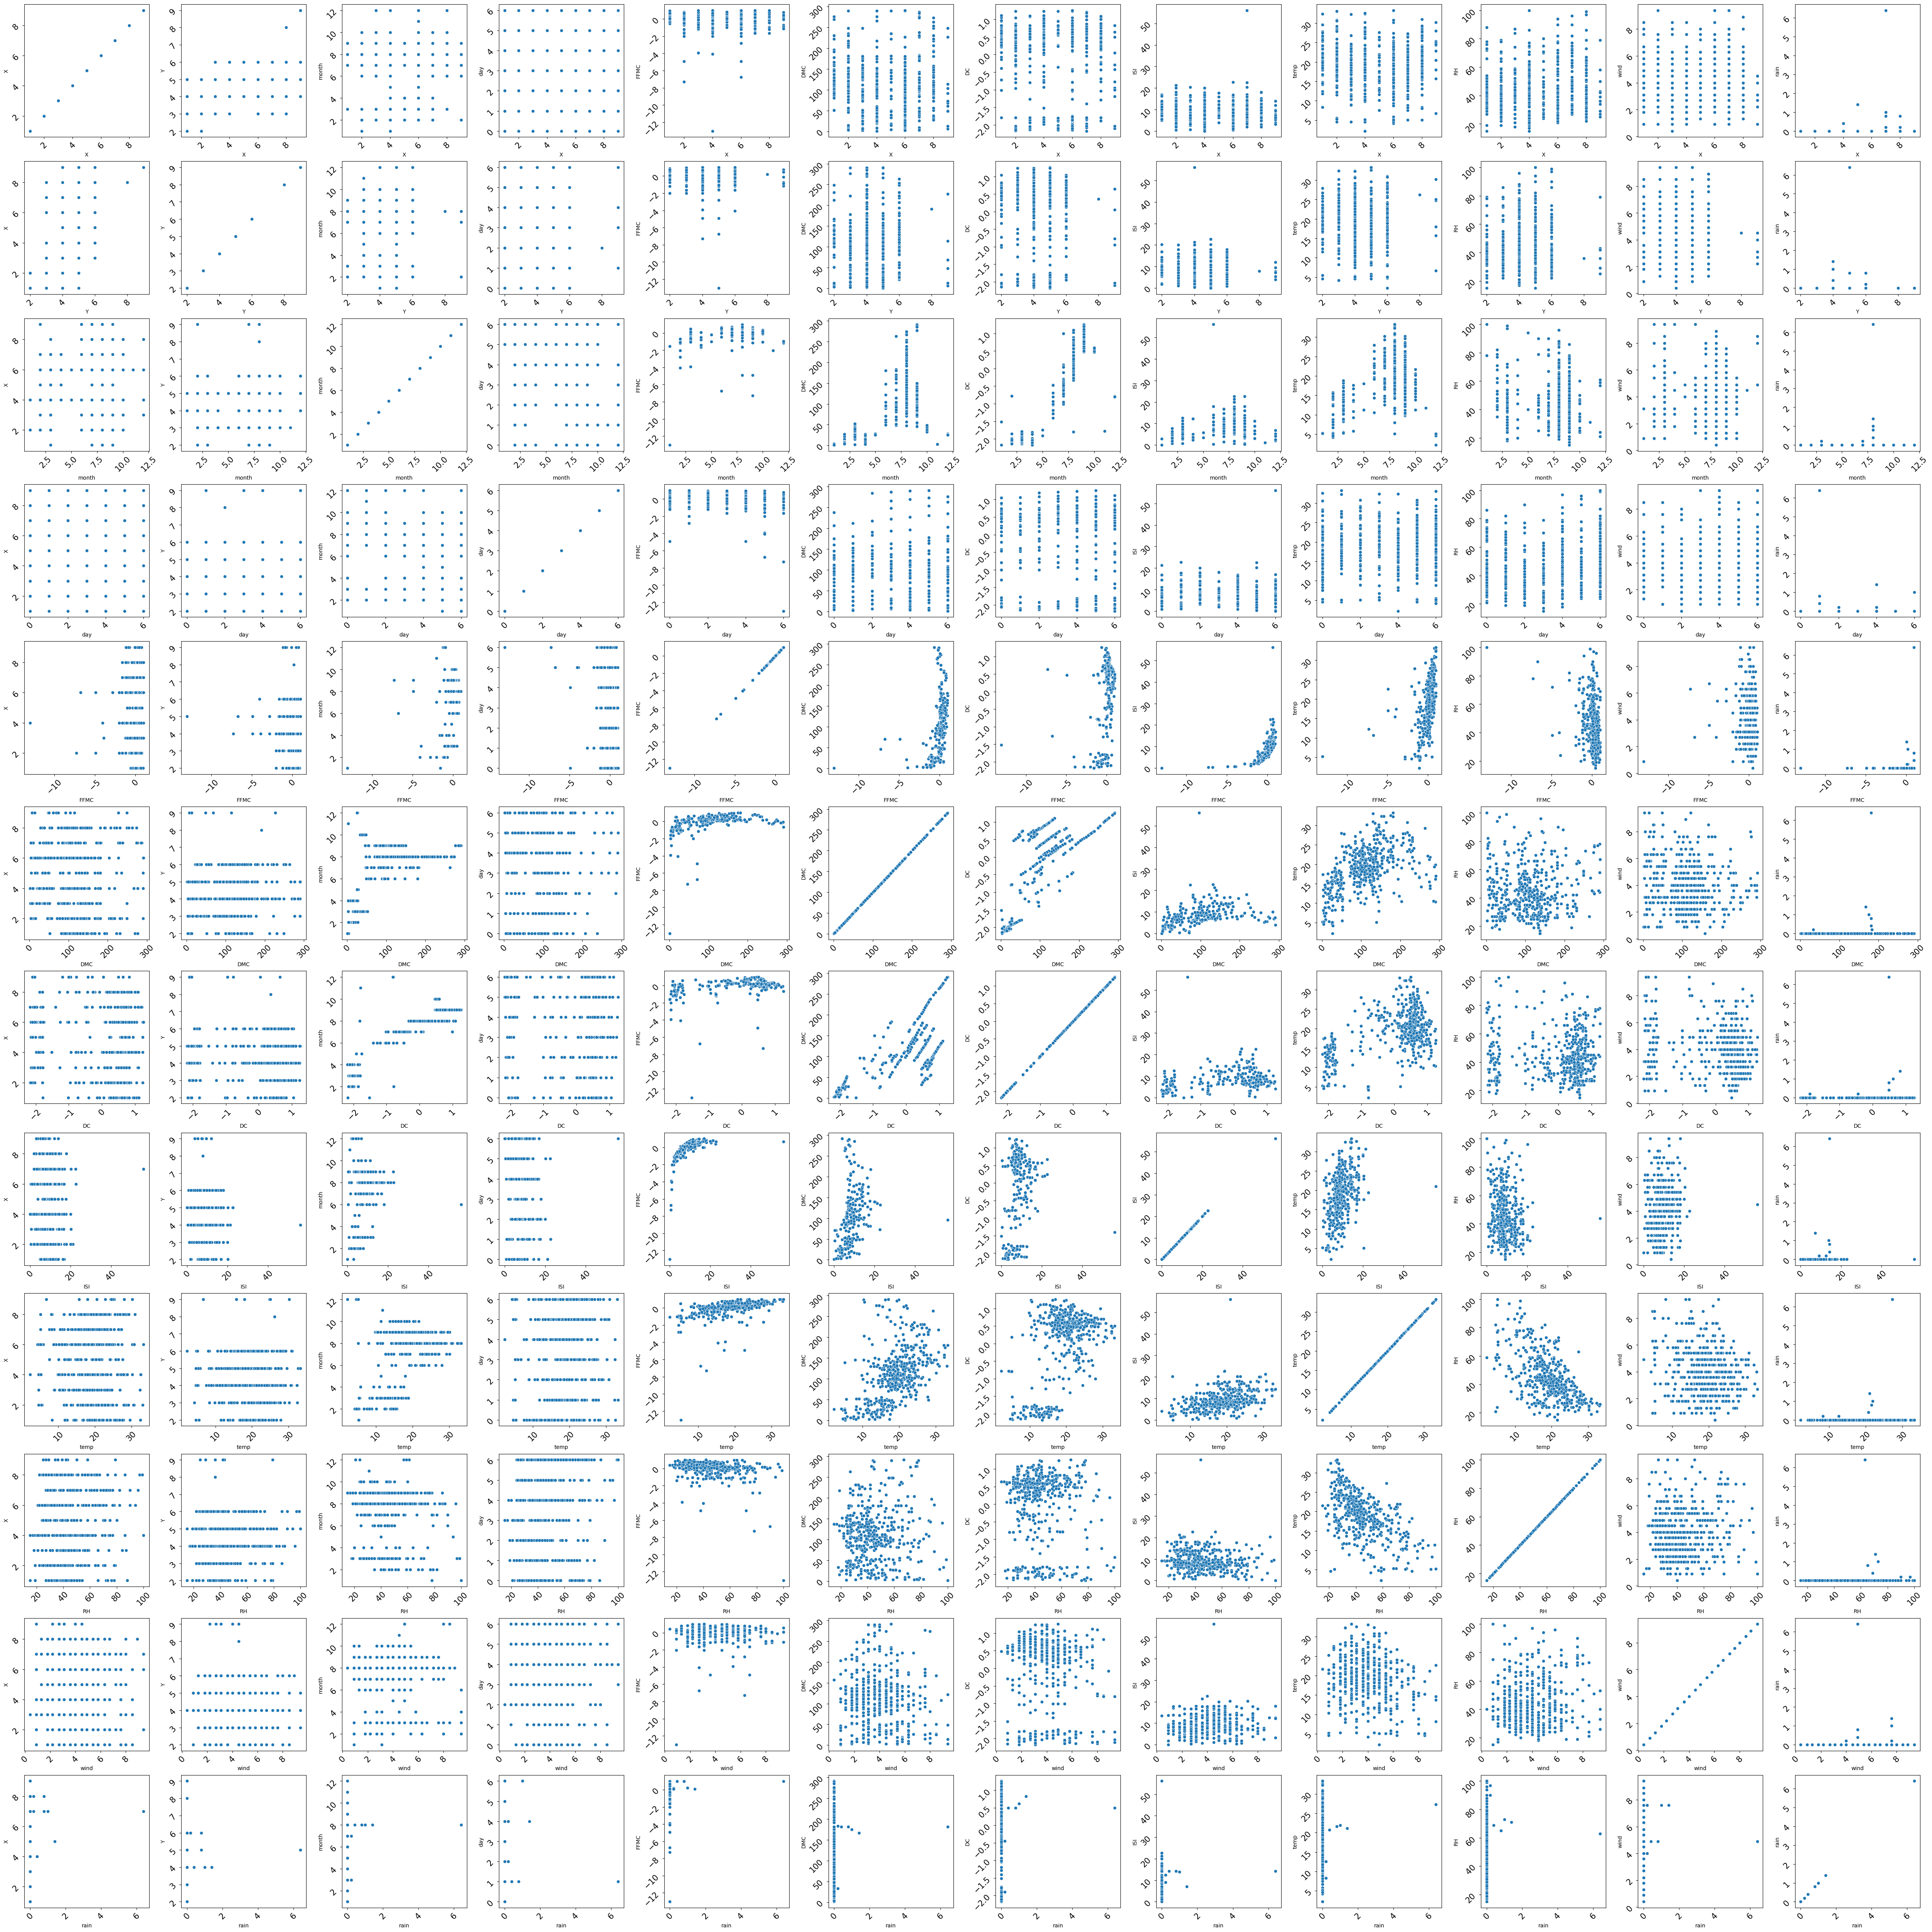

In [72]:
fig, axs = plt.subplots(ncols= 12, nrows= 12, constrained_layout= True)
fig.set_figwidth(50)
fig.set_figheight(50)
for i, col_name_i in enumerate(data.columns[:-1]):
    for j, col_name_j in enumerate(data.columns[:-1]):
        ax = axs[i,j]
        ax.tick_params(labelrotation= 45, labelsize= 15)
        sns.scatterplot(x= col_name_i, y= col_name_j, data= data, ax= ax)

In [74]:
# Prepare the features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values   # The last column (area)

In [75]:
# Add a bias term (intercept) to the feature matrix
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones to the front of X

In [76]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 42)

In [77]:
# beta_hat = (X^T * X)^(-1) * X^T * y
beta_hat = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

In [78]:
# Make predictions on the test set
y_pred = X_test @ beta_hat

In [79]:
# Calculate the Mean Squared Error (MSE)
# Calculate the squared differences
squared_differences = (y_test - y_pred) ** 2

# Calculate the mean of the squared differences
mse = np.mean(squared_differences)

In [80]:
print("Mean Squared Error:", mse)

Mean Squared Error: 10282.81702038058


In [81]:
# Standardizing the Data Manually
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [82]:
# Add a bias term (intercept) to the standardized feature matrix
X_train_standardized = np.hstack((np.ones((X_train_standardized.shape[0], 1)), X_train_standardized))
X_test_standardized = np.hstack((np.ones((X_test_standardized.shape[0], 1)), X_test_standardized))

In [83]:
# --- Calculate Covariance Matrix ---
cov_matrix = np.cov(X_train_standardized.T)

# Calculate the coefficients for the standardized data
beta_hat_standardized = cov_matrix @ (X_train_standardized.T @ y_train)

In [84]:
# Make predictions on the test set
y_pred_standardized = X_test_standardized @ beta_hat_standardized

In [104]:
# Calculate the Mean Squared Error (MSE) for standardized data
# Step 1: Calculate the squared differences
squared_differences_standardized = (y_test - y_pred_standardized) ** 2

# Step 2: Calculate the mean of the squared differences
mse_standardized = np.mean(squared_differences_standardized)

In [105]:
# --- Results ---
print("Mean Squared Error (Original Data):", mse)
print("Mean Squared Error (Standardized Data):", mse_standardized)

Mean Squared Error (Original Data): 10282.81702038058
Mean Squared Error (Standardized Data): 337244034.02230024


### Assignment 3 (2 scores):

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

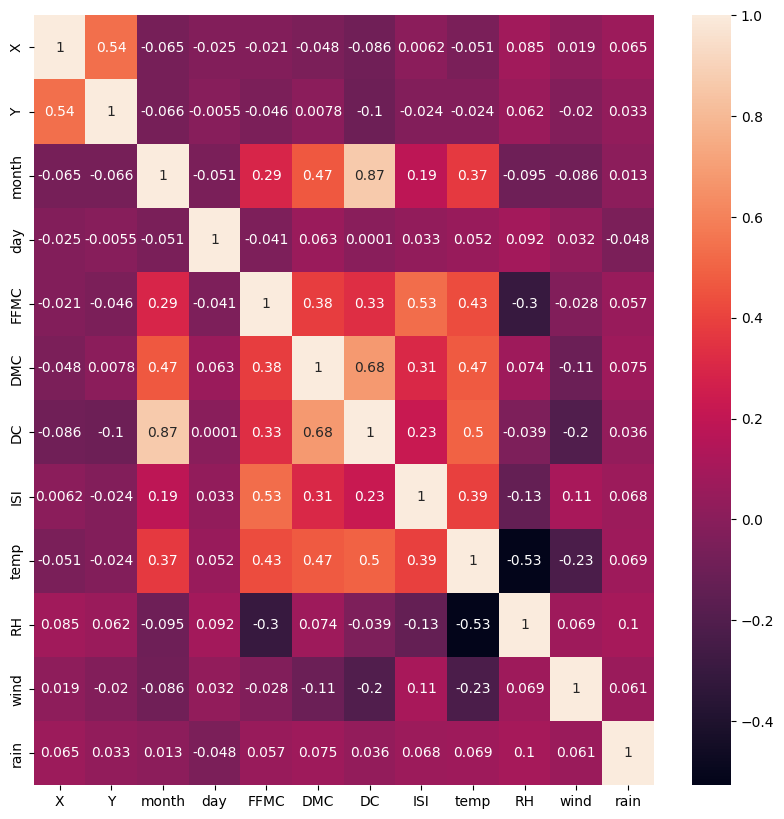

In [90]:
# Set a threshold for collinearity
threshold = 0.8
collinear_features = set()

cov = np.zeros((len(data.columns[:-1]), len(data.columns[:-1])))
for i, col_name_i in enumerate(data.columns[:-1]):
    for j, col_name_j in enumerate(data.columns[:-1]):
        cov[i, j] = np.corrcoef(data[col_name_i].to_numpy(), data[col_name_j].to_numpy())[0, 1]

plt.figure(figsize= (10, 10))
sns.heatmap(cov, xticklabels= data.columns[:-1], yticklabels= data.columns[:-1], annot= cov)

# Remove collinear feature (month) from the dataset
collinear_features.add('month')
data_reduced = data.drop(columns=collinear_features)

In [92]:
# Prepare the features (X) for preprocessed data
X_reduced = data_reduced.iloc[:, :-1].values  # All columns except the last

In [102]:
# Split preprocessed data
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.23, random_state=42)

# Perform Linear Regression on preprocessed data
beta_hat_reduced = np.linalg.inv(X_train_reduced.T @ X_train_reduced) @ (X_train_reduced.T @ y_train)
y_pred_reduced = X_test_reduced @ beta_hat_reduced

# Calculate the Mean Squared Error for the reduced data
# Calculate the squared differences
squared_differences_reduced = (y_test - y_pred_reduced) ** 2

# Calculate the mean of the squared differences
mse_reduced = np.mean(squared_differences_reduced)

# Print the results
print(f"Original Data MSE: {mse:.2f}")
print(f"Preprocessed Data MSE: {mse_reduced:.2f}")

Original Data MSE: 10282.82
Preprocessed Data MSE: 10300.61


### Assignment 4 (2 scores):

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.

In [95]:
from sklearn.linear_model import LinearRegression

In [103]:
# Using Scikit-learn's Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting using the model
y_pred_sklearn = model.predict(X_test)

# Calculate the Mean Squared Error for sklearn's usage
# Calculate the squared differences
squared_differences_scikit = (y_test - y_pred_sklearn) ** 2

# Calculate the mean of the squared differences
mse_scikit = np.mean(squared_differences_scikit)
print(f"Scikit-learn Linear Regression MSE: {mse_scikit:.2f}")

Scikit-learn Linear Regression MSE: 10282.82
